In [39]:
from loadData import loadData
from initAnalysis import initAnalysis
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np

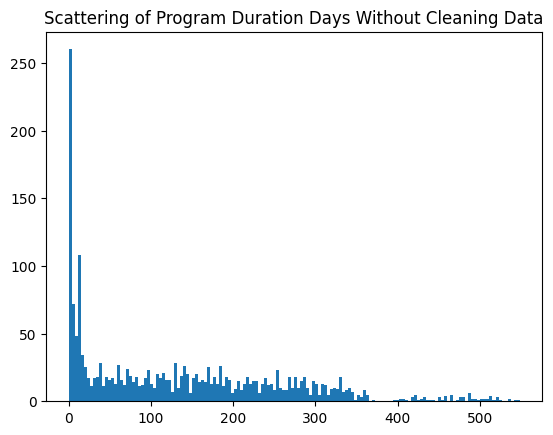

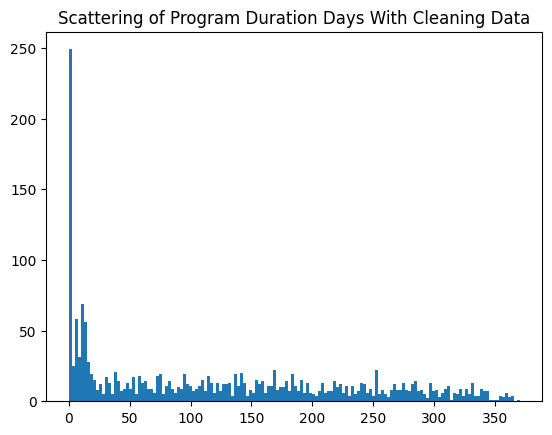

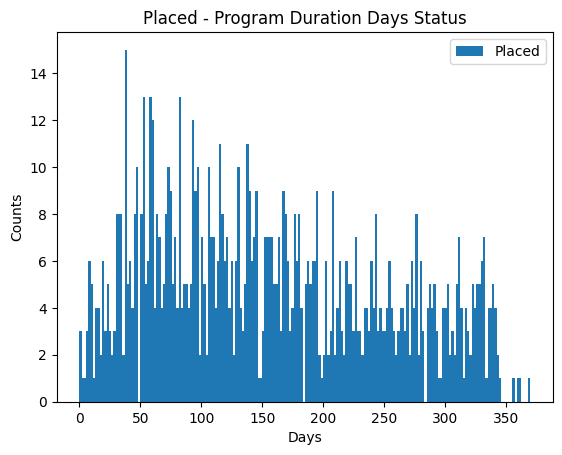

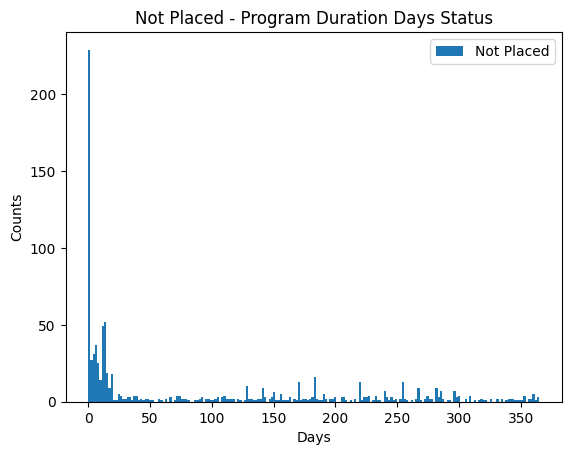

In [44]:
dataFrame = loadData()

#Prepare Data
#Cleaning Data

dataFrame = dataFrame.dropna(subset=["program_duration_days"])
minimum = dataFrame["program_duration_days"].min()
maxnimum = dataFrame["program_duration_days"].max()
count = dataFrame["program_duration_days"].count()
range = np.linspace(minimum,maxnimum,count)

plt.title('Scattering of Program Duration Days Without Cleaning Data')
plt.hist(dataFrame["program_duration_days"],bins=150)
plt.show()


dataFrame["program_duration_days"] = np.where(dataFrame["program_duration_days"] > 380, np.nan, dataFrame["program_duration_days"])
dataFrame = dataFrame.dropna(subset=["program_duration_days"])
plt.title('Scattering of Program Duration Days With Cleaning Data')
plt.hist(dataFrame["program_duration_days"],bins=150)
plt.show() 

#End Prepare Data
#End Cleaning Data


targetPlaced, dataPlaced, targetNotPlaced, dataNotPlaced = initAnalysis(dataFrame)

programDurationDaysPlaced = dataPlaced["program_duration_days"]
programDurationDaysNotPlaced = dataNotPlaced["program_duration_days"]


programDurationDaysPlacedDataFrame = pd.DataFrame({
    'Placed': programDurationDaysPlaced,
}).dropna()
programDurationDaysPlacedDataFrame.plot.hist(bins=200)
plt.xlabel('Days')
plt.ylabel('Counts')
plt.title('Placed - Program Duration Days Status')
plt.show()


programDurationDaysNotPlacedDataFrame = pd.DataFrame({
    'Not Placed': programDurationDaysNotPlaced
}).dropna()
programDurationDaysNotPlacedDataFrame.plot.hist(bins=200)
plt.xlabel('Days')
plt.ylabel('Counts')
plt.title('Not Placed - Program Duration Days Status')
plt.show()
